In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from cosmogev import Cosmology, Genextreme
from scipy import stats

In [2]:
mill = Cosmology(0.73, 0.25, 0.045, 1.0, 0.9, ).normalizePower()

mill

In [3]:
# load data

delta = np.loadtxt("./data/mmfieldz0.csv", delimiter=',', unpack=True)[2]

ngrid    = 32
boxsize  = 62.5
cellsize = boxsize / ngrid

# get the over density field (log)

delta = delta / delta.mean() - 1
lnd   = np.log( delta + 1 )

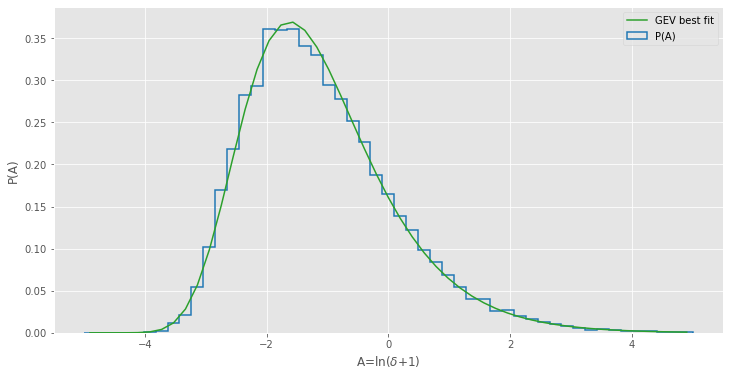

In [4]:
# get the distribution of the over density field (log)

plt.figure( figsize = [12,6] )

pdist, vals, _ = plt.hist( 
                            lnd, bins = 51, range = [-5, 5], density = True, 
                            histtype = 'step', lw = 1.5, label = 'P(A)', color = 'tab:blue' 
                          )
vals  = 0.5 * ( vals[:-1] + vals[1:] )

# get best fitting gev distribution

shape, loc, scale = stats.genextreme.fit( lnd )
plt.plot( vals, stats.genextreme.pdf( vals, shape, loc, scale ), '-', lw = 1.5, label = 'GEV best fit', color = 'tab:green' )

plt.xlabel('A=ln($\\delta$+1)')
plt.ylabel('P(A)')
plt.legend()

plt.show()

In [5]:
gev = Genextreme(cellsize, mill)

gev.parametrize(0.0)

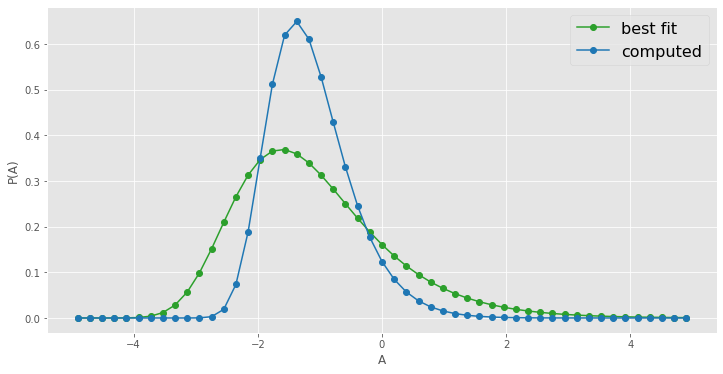

In [6]:
plt.figure( figsize = [12, 6] )

plt.plot( vals, stats.genextreme.pdf( vals, shape, loc, scale ), '-o', label = 'best fit', color = 'tab:green' )
plt.plot( vals, gev.pdf( vals ), '-o', label = 'computed', color = 'tab:blue' )

plt.legend(fontsize = 16)
plt.xlabel( 'A' )
plt.ylabel( 'P(A)' )

plt.show()